<a href="https://colab.research.google.com/github/Son129/DBA4/blob/main/20250317_%EB%AF%B8%EB%93%9C%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%ED%96%89%EB%B3%B5%EC%A7%80%EC%88%98_%2B_%EC%B6%9C%EC%82%B0%EC%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import os


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
#  World happiness report data와 fertility rate 불러오기

h = pd.read_excel('/content/gdrive/MyDrive/2025_MidProject/2020~2024 국가별 데이터.xlsx')
f_rates = pd.read_excel('/content/gdrive/MyDrive/2025_MidProject/fertility per woman_2019_2023.xlsx')

In [4]:
f_rates

,Country name,Regional indicator,Year,Fertility rate
0,Afghanistan,South Asia,2019,5.238
1,Afghanistan,South Asia,2020,5.145
2,Afghanistan,South Asia,2021,5.039
3,Afghanistan,South Asia,2022,4.932
4,Afghanistan,South Asia,2023,4.840
...,...,...,...,...
1260,Zimbabwe,Sub-Saharan Africa,2019,3.748
1261,Zimbabwe,Sub-Saharan Africa,2020,3.754
1262,Zimbabwe,Sub-Saharan Africa,2021,3.765
1263,Zimbabwe,Sub-Saharan Africa,2022,3.767


In [5]:
# #  World happiness report data와 fertility rate merge

h['Country name'] = h['Country name'].str.replace('*', '', regex=False)
dt = pd.merge(h, f_rates, left_on=['Country name','Regional indicator','Year'], right_on=['Country name','Regional indicator','Year'], how='left')
dt

,Country name,Regional indicator,Year,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Fertility rate
0,Afghanistan,South Asia,2019,2.5669,2.628270,2.505530,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236,5.238
1,Afghanistan,South Asia,2020,2.5229,2.596468,2.449332,0.370120,0.000000,0.126440,0.000000,0.121641,0.009569,1.895141,5.145
2,Afghanistan,South Asia,2021,2.4038,2.468731,2.338869,0.757994,0.000000,0.288626,0.000000,0.088873,0.004882,1.263403,5.039
3,Afghanistan,South Asia,2022,1.8590,1.922712,1.795288,0.644600,0.000000,0.086704,0.000000,0.092965,0.058644,0.976065,4.932
4,Afghanistan,South Asia,2023,1.7210,1.775271,1.666728,0.628138,0.000000,0.241763,0.000000,0.090736,0.088471,0.671903,4.840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Zimbabwe,Sub-Saharan Africa,2019,3.2992,3.414202,3.184198,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,3.748
656,Zimbabwe,Sub-Saharan Africa,2020,3.1448,3.259349,3.030251,0.456724,0.648552,0.243230,0.358907,0.157088,0.075471,1.204845,3.754
657,Zimbabwe,Sub-Saharan Africa,2021,2.9951,3.109822,2.880378,0.946604,0.690460,0.270086,0.329203,0.106265,0.104943,0.547529,3.765
658,Zimbabwe,Sub-Saharan Africa,2022,3.2035,3.322795,3.084205,0.758279,0.880513,0.068653,0.362508,0.111627,0.117115,0.904856,3.767


In [6]:
na_fertility_rows = dt[dt['Fertility rate '].isna()]
na_fertility_rows

,Country name,Regional indicator,Year,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Fertility rate
280,Ivory Coast,Sub-Saharan Africa,2019,5.2333,5.376567,5.090033,0.537094,0.799727,0.154943,0.397123,0.169916,0.093496,3.081023,NaN
281,Ivory Coast,Sub-Saharan Africa,2020,5.3060,5.459510,5.152490,0.669316,0.408907,0.051513,0.437712,0.177215,0.092391,3.468930,NaN
282,Ivory Coast,Sub-Saharan Africa,2021,5.2346,5.384376,5.084824,1.094041,0.442403,0.322376,0.451082,0.148908,0.123703,2.652080,NaN
283,Ivory Coast,Sub-Saharan Africa,2022,5.0527,5.198414,4.906986,1.093753,0.583531,0.120498,0.467102,0.137945,0.131248,2.518610,NaN
284,Ivory Coast,Sub-Saharan Africa,2023,5.0801,5.223806,4.936394,1.080131,0.577631,0.287582,0.546951,0.120493,0.164070,2.303245,NaN


In [7]:
dt.info()
dt.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                660 non-null    object 
 1   Regional indicator                          660 non-null    object 
 2   Year                                        660 non-null    int64  
 3   Ladder score                                660 non-null    float64
 4   upperwhisker                                660 non-null    float64
 5   lowerwhisker                                660 non-null    float64
 6   Explained by: Log GDP per capita            660 non-null    float64
 7   Explained by: Social support                660 non-null    float64
 8   Explained by: Healthy life expectancy       660 non-null    float64
 9   Explained by: Freedom to make life choices  660 non-null    float64
 10  Explained by: 

,0
Country name,0
Regional indicator,0
Year,0
Ladder score,0
upperwhisker,0
lowerwhisker,0
Explained by: Log GDP per capita,0
Explained by: Social support,0
Explained by: Healthy life expectancy,0
Explained by: Freedom to make life choices,0


In [8]:
# 결측치 제거

dt_cleaned = dt.dropna()
dt = dt_cleaned.rename(columns={'Fertility rate ': 'Fertility rate'})

In [9]:
# 새로운 변수 Fertility rate 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dt['Fertility rate'] = scaler.fit_transform(dt[['Fertility rate']])
dt.head()

,Country name,Regional indicator,Year,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Fertility rate
0,Afghanistan,South Asia,2019,2.5669,2.628270,2.505530,0.300706,0.356434,0.266052,0.0,0.135235,0.001226,1.507236,2.333664
1,Afghanistan,South Asia,2020,2.5229,2.596468,2.449332,0.370120,0.000000,0.126440,0.0,0.121641,0.009569,1.895141,2.257815
2,Afghanistan,South Asia,2021,2.4038,2.468731,2.338869,0.757994,0.000000,0.288626,0.0,0.088873,0.004882,1.263403,2.171363
3,Afghanistan,South Asia,2022,1.8590,1.922712,1.795288,0.644600,0.000000,0.086704,0.0,0.092965,0.058644,0.976065,2.084096
4,Afghanistan,South Asia,2023,1.7210,1.775271,1.666728,0.628138,0.000000,0.241763,0.0,0.090736,0.088471,0.671903,2.009062


In [10]:
# 데이터 저장
dt.to_excel('Happiness+Fertility_S_2019_2023.xlsx', index=False)

# **World happiness report data에 조사한 변수 Fertility rate 추가 가능할 지 회귀식 추정**

=> 2019년 제외 다른 년도 데이터 raw data 없어 사용 불가

In [11]:
# Raw data가 있는 2019년 회귀식에 Fertility rate 변수 넣어 맞춰보기
dt_2019 = pd.read_excel('/content/gdrive/MyDrive/2025_MidProject/World_happiness_2019.xlsx')
dt_2019 = pd.merge(dt_2019, dt[['Country name', 'Regional indicator', 'Year','Fertility rate']],
                    on=['Country name', 'Regional indicator', 'Year'],
                    how='left')

dt_2019.copy()
dt_2019

,Country name,Regional indicator,Year,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Fertility rate
0,Finland,Western Europe,2019,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900826,...,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,-0.836503
1,Denmark,Western Europe,2019,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,...,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,-0.553496
2,Switzerland,Western Europe,2019,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,...,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,-0.732924
3,Iceland,Western Europe,2019,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,...,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,-0.515979
4,Norway,Western Europe,2019,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,...,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,-0.688067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,2019,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,...,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,NaN
149,Rwanda,Sub-Saharan Africa,2019,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,...,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,NaN
150,Zimbabwe,Sub-Saharan Africa,2019,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,...,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,1.118447
151,South Sudan,Sub-Saharan Africa,2019,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,...,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,NaN


In [12]:
dt_2019.isnull().sum()

,0
Country name,0
Regional indicator,0
Year,0
Ladder score,0
Standard error of ladder score,0
upperwhisker,0
lowerwhisker,0
Logged GDP per capita,0
Social support,0
Healthy life expectancy,0


In [13]:
dt_19 = dt_2019.dropna()
dt_19.isnull().sum()

,0
Country name,0
Regional indicator,0
Year,0
Ladder score,0
Standard error of ladder score,0
upperwhisker,0
lowerwhisker,0
Logged GDP per capita,0
Social support,0
Healthy life expectancy,0


In [19]:
# 다중 회귀 분석
import statsmodels.api as sm

# 독립 변수(X) 및 종속 변수(Y) 설정
X = dt_19[['Logged GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Fertility rate']]
y = dt_19['Ladder score']

# 상수 추가 (회귀 모델용)
X = sm.add_constant(X)

# 다중 회귀 분석 실행
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     58.54
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           9.94e-34
Time:                        12:53:52   Log-Likelihood:                -106.05
No. Observations:                 130   AIC:                             226.1
Df Residuals:                     123   BIC:                             246.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

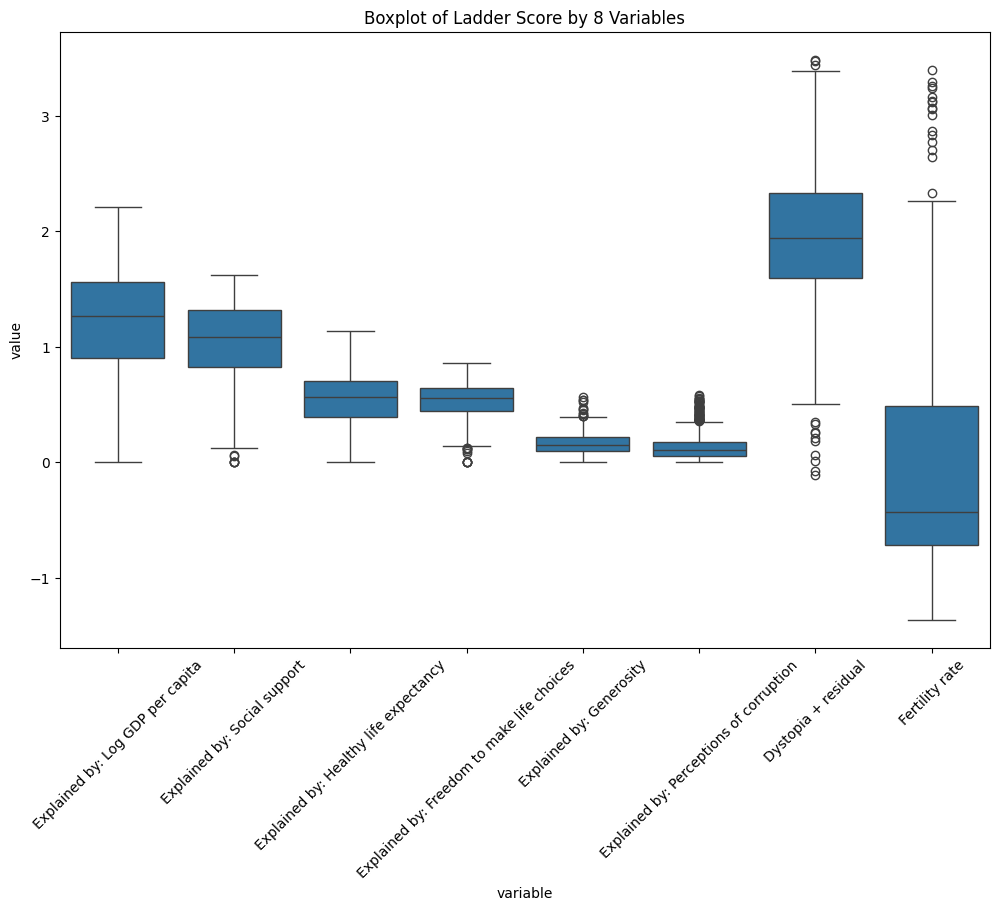

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = dt.columns[6:]


# boxplot 그리기
plt.figure(figsize=(12, 8))  # 플롯 크기 조정
sns.boxplot(data=dt[columns].melt(id_vars=[], value_vars=columns), x='variable', y='value')  # 변수별로 melt 사용

plt.xticks(rotation=45)  # x축 레이블 회전 (긴 변수명에 유용)
plt.title('Boxplot of Ladder Score by 8 Variables')  # 그래프 제목
plt.show()

In [36]:
# 출산율과 행복지수의 상관관계
corr_FL = dt[['Fertility rate', 'Ladder score']].corr()
corr_FL

,Fertility rate,Ladder score
Fertility rate,1.000000,-0.641289
Ladder score,-0.641289,1.000000


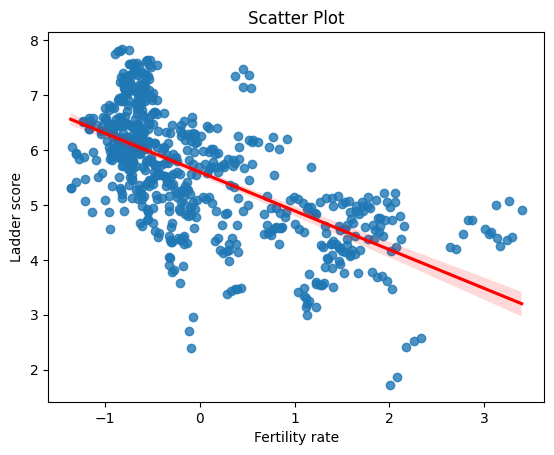

In [44]:
# 산점도와 추세선
sns.regplot(x='Fertility rate', y='Ladder score', data=dt, line_kws={'color': 'red'})

# 레이블 및 제목 추가
plt.xlabel('Fertility rate')
plt.ylabel('Ladder score')
plt.title('Scatter Plot')
plt.show()

# **국가 년도별 출산율과 행복지수의 상관도**

In [20]:
# 대륙별로 그룹화 후, 출산율과 행복지수 간 상관계수 계산
region_groups = dt.groupby('Regional indicator')

# 각 대륙별 상관계수를 계산하고 저장
corr_region_dict = {}

for region, group in region_groups:
    # 각 대륙 내 상관계수 계산
    corr_region = group[['Fertility rate', 'Ladder score']].corr().iloc[0, 1]
    corr_region_dict[region] = corr_region

# 결과 출력
corr_region_df = pd.DataFrame(list(corr_region_dict.items()), columns=['Region', 'Correlation'])
print(corr_region_df)

                               Region  Correlation
0          Central and Eastern Europe    -0.012068
1  Commonwealth of Independent States     0.721836
2                           East Asia    -0.209550
3         Latin America and Caribbean    -0.389164
4        Middle East and North Africa    -0.085684
5               North America and ANZ     0.210209
6                          South Asia    -0.642500
7                      Southeast Asia    -0.800769
8                  Sub-Saharan Africa    -0.145421
9                      Western Europe     0.412813


<ipython-input-45-d605acce71ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Correlation', data=corr_region_df, palette='coolwarm')


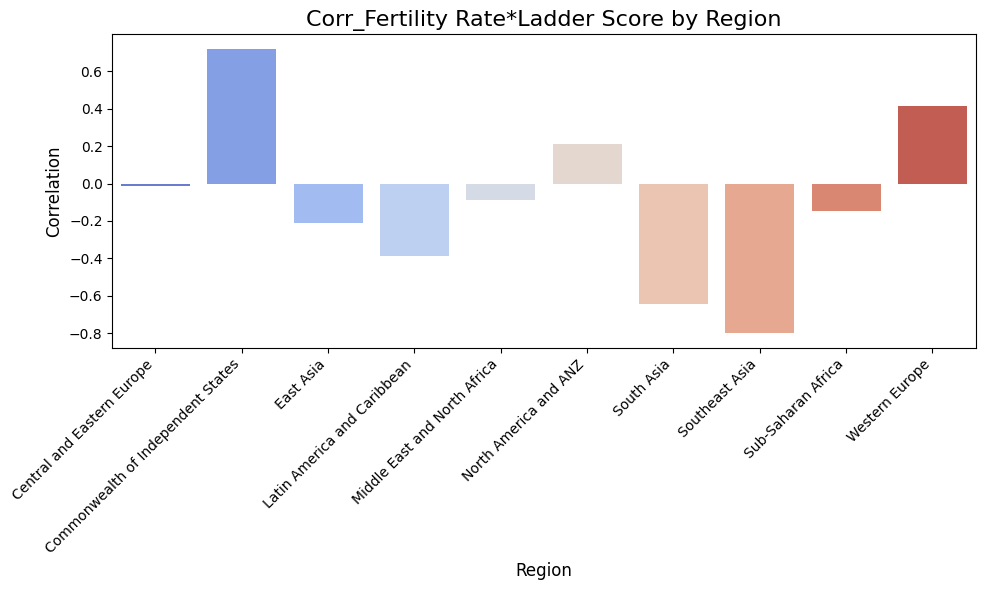

In [45]:
# 막대그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Correlation', data=corr_region_df, palette='coolwarm')

# 그래프 제목과 라벨 설정
plt.title("Corr_Fertility Rate*Ladder Score by Region", fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Correlation', fontsize=12)

# 그래프 회전 (대륙명이 길 경우 가독성을 높이기 위해)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()  # 레이아웃 조정
plt.show()

# **출산율과 종교와의 상관관계 보기 위해 종교 변수 merge**

In [25]:
r = pd.read_excel('/content/gdrive/MyDrive/2025_MidProject/World Religion.xlsx')

In [26]:
dt.info()
r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655 entries, 0 to 659
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                655 non-null    object 
 1   Regional indicator                          655 non-null    object 
 2   Year                                        655 non-null    int64  
 3   Ladder score                                655 non-null    float64
 4   upperwhisker                                655 non-null    float64
 5   lowerwhisker                                655 non-null    float64
 6   Explained by: Log GDP per capita            655 non-null    float64
 7   Explained by: Social support                655 non-null    float64
 8   Explained by: Healthy life expectancy       655 non-null    float64
 9   Explained by: Freedom to make life choices  655 non-null    float64
 10  Explained by: Gener

# World happiness report + Fertility rate에 Religion merge

In [27]:
r.head()

,Countries,Religion,경도(생성됨),위도(생성됨)
0,Zimbabwe,Christian,30.0470,-19.0980
1,Zambia,Christian,25.2680,-15.1300
2,Yemen,Islam,47.7930,15.5690
3,Western Sahara (proposed state),Islam,-13.6266,24.4813
4,Vietnam,Buddhist,105.3730,21.7500


In [31]:
dt_r= pd.merge(dt, r, left_on=['Country name'], right_on=['Countries'], how='left')
dt_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                655 non-null    object 
 1   Regional indicator                          655 non-null    object 
 2   Year                                        655 non-null    int64  
 3   Ladder score                                655 non-null    float64
 4   upperwhisker                                655 non-null    float64
 5   lowerwhisker                                655 non-null    float64
 6   Explained by: Log GDP per capita            655 non-null    float64
 7   Explained by: Social support                655 non-null    float64
 8   Explained by: Healthy life expectancy       655 non-null    float64
 9   Explained by: Freedom to make life choices  655 non-null    float64
 10  Explained by: 

In [32]:
dt_r.to_excel('H+F+R_2019_2023.xlsx', index=False)
dt_r

,Country name,Regional indicator,Year,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Fertility rate,Countries,Religion,경도(생성됨),위도(생성됨)
0,Afghanistan,South Asia,2019,2.5669,2.628270,2.505530,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236,2.333664,Afghanistan,Islam,65.5267,34.023
1,Afghanistan,South Asia,2020,2.5229,2.596468,2.449332,0.370120,0.000000,0.126440,0.000000,0.121641,0.009569,1.895141,2.257815,Afghanistan,Islam,65.5267,34.023
2,Afghanistan,South Asia,2021,2.4038,2.468731,2.338869,0.757994,0.000000,0.288626,0.000000,0.088873,0.004882,1.263403,2.171363,Afghanistan,Islam,65.5267,34.023
3,Afghanistan,South Asia,2022,1.8590,1.922712,1.795288,0.644600,0.000000,0.086704,0.000000,0.092965,0.058644,0.976065,2.084096,Afghanistan,Islam,65.5267,34.023
4,Afghanistan,South Asia,2023,1.7210,1.775271,1.666728,0.628138,0.000000,0.241763,0.000000,0.090736,0.088471,0.671903,2.009062,Afghanistan,Islam,65.5267,34.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,Zimbabwe,Sub-Saharan Africa,2019,3.2992,3.414202,3.184198,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,1.118447,Zimbabwe,Christian,30.0470,-19.098
651,Zimbabwe,Sub-Saharan Africa,2020,3.1448,3.259349,3.030251,0.456724,0.648552,0.243230,0.358907,0.157088,0.075471,1.204845,1.123340,Zimbabwe,Christian,30.0470,-19.098
652,Zimbabwe,Sub-Saharan Africa,2021,2.9951,3.109822,2.880378,0.946604,0.690460,0.270086,0.329203,0.106265,0.104943,0.547529,1.132312,Zimbabwe,Christian,30.0470,-19.098
653,Zimbabwe,Sub-Saharan Africa,2022,3.2035,3.322795,3.084205,0.758279,0.880513,0.068653,0.362508,0.111627,0.117115,0.904856,1.133943,Zimbabwe,Christian,30.0470,-19.098
